<a href="https://colab.research.google.com/github/maliekici/zero_to_ComputerVision/blob/main/haar_cascade_classifiers/L17vehicle_and_pedestrian_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Vehicle and Pedestrian Detection**

####**In this lesson we'll learn:**
1. Use a Haarcascade classier to detect Pedestrians
2. Use our Haarcascade classifiers on videos
3. Use a Haarcascade classier to detect Vehicles or cars


In [1]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

# Download and unzip our videos and Haarcascade Classifiers
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/videos.zip
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip

!unzip -qq haarcascades.zip
!unzip -qq videos.zip

--2022-10-14 12:19:56--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/videos.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 3.5.244.11
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|3.5.244.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4142728 (4.0M) [application/zip]
Saving to: ‘videos.zip’

videos.zip          100%[===================>]   3.95M  4.18MB/s    in 0.9s    

2022-10-14 12:19:57 (4.18 MB/s) - ‘videos.zip’ saved [4142728/4142728]

--2022-10-14 12:19:57--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 3.5.244.11
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|3.5.244.11|:443... connected.
HTTP request sen

#### **Testing on a Single Frame from our Video**

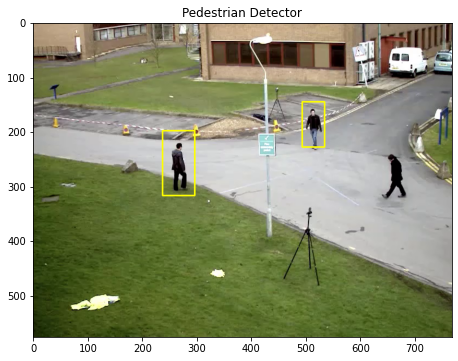

In [2]:
# Create our video capturing object
cap = cv2.VideoCapture('walking.mp4')

# Load our body classifier
body_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_fullbody.xml')

# Read first frame
ret, frame = cap.read()

# Ret is True if successfully read
if ret: 

  #Grayscale our image for faster processing
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  # Pass frame to our body classifier
  bodies = body_classifier.detectMultiScale(gray, 1.2, 3)

  # Extract bounding boxes for any bodies identified
  for (x,y,w,h) in bodies:
      cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
  
# Release our video capture
cap.release()   
imshow("Pedestrian Detector", frame)

#### **Testing on our 15 second clip**

**NOTE**: Takes around 1 minute to run.

We use cv2.VideoWriter to save the output as an AVI file.

```cv2.VideoWriter(video_output.avi, cv2.VideoWriter_fourcc('M','J','P','G'), FPS, (width, height))```

Formats can be:
- 'M','J','P','G' or MJPG
- MP4V
- X264
- avc1
- XVID



In [3]:
# Create our video capturing object
cap = cv2.VideoCapture('walking.mp4')

# Get the height and width of the frame (required to be an interfer)
w = int(cap.get(3))
h = int(cap.get(4))

# Define the codec and create VideoWriter object.The output is stored in 'walking_output.avi' file.
out = cv2.VideoWriter('walking_output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

body_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_fullbody.xml')

# Loop once video is successfully loaded
while(True):

  ret, frame = cap.read()
  if ret: 

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Pass frame to our body classifier
    bodies = body_detector.detectMultiScale(gray, 1.2, 3)

    # Extract bounding boxes for any bodies identified
    for (x,y,w,h) in bodies:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
    
    # Write the frame into the file 'output.avi'
    out.write(frame)
  else:
      break

cap.release()
out.release()

## **Play Video within Colab**
Steps
1. Convert the AVI file to MP4 using FFMPEG
2. Load the HTML plugins in IPython
3. Display our HTML video player

In [4]:
!ffmpeg -i /content/walking_output.avi walking_output.mp4 -y

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [5]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('walking_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [6]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

#### **Vehicle Detection on Single Image**

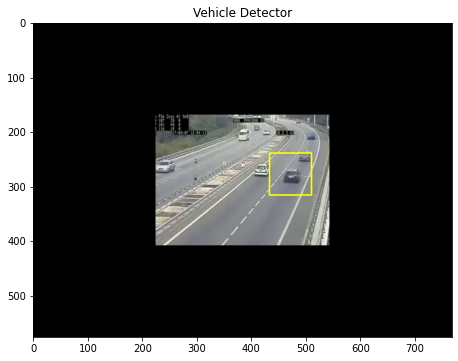

In [7]:
# Create our video capturing object
cap = cv2.VideoCapture('cars.mp4')

# Load our vehicle classifier
vehicle_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_car.xml')

# Read first frame
ret, frame = cap.read()

# Ret is True if successfully read
if ret: 

  #Grayscale our image for faster processing
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

  # Pass frame to our body classifier
  vehicles = vehicle_detector.detectMultiScale(gray, 1.4, 2)

  # Extract bounding boxes for any bodies identified
  for (x,y,w,h) in vehicles:
      cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
  
# Release our video capture
cap.release()   
imshow("Vehicle Detector", frame)

#### **Testing on our 15 second clip**

In [8]:
# Create our video capturing object
cap = cv2.VideoCapture('cars.mp4')

# Get the height and width of the frame (required to be an interfer)
w = int(cap.get(3))
h = int(cap.get(4))

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('cars_output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))

vehicle_detector = cv2.CascadeClassifier('Haarcascades/haarcascade_car.xml')

# Loop once video is successfully loaded
while(True):

  ret, frame = cap.read()
  if ret: 

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Pass frame to our body classifier
    vehicles = vehicle_detector.detectMultiScale(gray, 1.2, 3)

    # Extract bounding boxes for any bodies identified
    for (x,y,w,h) in vehicles:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
    
    # Write the frame into the file 'output.avi'
    out.write(frame)
  else:
      break

cap.release()
out.release()

In [9]:
!ffmpeg -i /content/cars_output.avi cars_output.mp4 -y

ffmpeg version 3.4.11-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-li

In [10]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('cars_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [11]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)